In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [3]:
# Parameters
csv = "EBOV-Cyno-Aero-2.csv-Table 1.csv"

df = pd.read_csv(csv)

# Get Summary Statistics

In [4]:
df.drop(['Day', 'TimeS'], axis=1).describe()

,AOPAMean_Mean,AOPAMean_Q25,AOPAMean_Q75,AOPDiastolic_Mean,AOPDiastolic_Q25,AOPDiastolic_Q75,AOPSystolic_Mean,AOPSystolic_Q25,AOPSystolic_Q75,Activity_Mean,...,RR_Mean,RR_Q25,RR_Q75,RespMean_Mean,RespMean_Q25,RespMean_Q75,Temp_Mean,Temp_Q25,Temp_Q75,Y
count,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,...,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000
mean,-0.052704,-0.565075,0.390380,-0.018023,-0.523439,0.428065,-0.090842,-0.574269,0.317623,-0.009878,...,-0.625252,-1.093770,-0.199316,0.505626,0.012552,1.026458,1.717181,1.409694,2.059558,0.507168
std,2.268396,2.282394,2.311784,2.161061,2.178897,2.204264,2.251396,2.256099,2.302862,0.205969,...,1.553757,1.523274,1.670070,1.608662,1.592342,1.694182,5.806468,6.194203,5.684373,0.500003
min,-32.705997,-35.316166,-32.218747,-32.446644,-34.923390,-31.792832,-31.606238,-33.594479,-30.666199,-0.923573,...,-26.393974,-26.543799,-26.286776,-4.291731,-4.361691,-4.291731,-53.123151,-89.270986,-34.615199,0.000000
25%,-0.514571,-1.004330,-0.153591,-0.460259,-0.961819,-0.083444,-0.554137,-0.999943,-0.236812,-0.029624,...,-1.073385,-1.455852,-0.746188,-0.290105,-0.790059,0.178119,-0.515832,-0.777396,-0.212173,0.000000
50%,-0.003708,-0.543450,0.455527,0.021720,-0.520203,0.486187,-0.037733,-0.530719,0.365396,0.000847,...,-0.297724,-0.789612,0.127750,0.142541,-0.323475,0.686814,0.309394,0.103759,0.578113,1.000000
75%,0.615087,0.048599,1.134522,0.584153,0.065217,1.117971,0.566964,0.047157,1.076712,0.018525,...,0.235616,-0.308208,0.804017,0.729439,0.277806,1.305782,1.452930,1.218581,1.790521,1.000000
max,22.009888,21.202697,23.124521,22.135060,21.317250,23.234397,20.505507,19.817832,21.560331,5.621855,...,5.379538,4.920295,7.475988,17.109422,16.985814,17.705097,36.154280,36.000557,36.714826,1.000000


# Get Sampling Info for All of Subjects - Is it consistent?

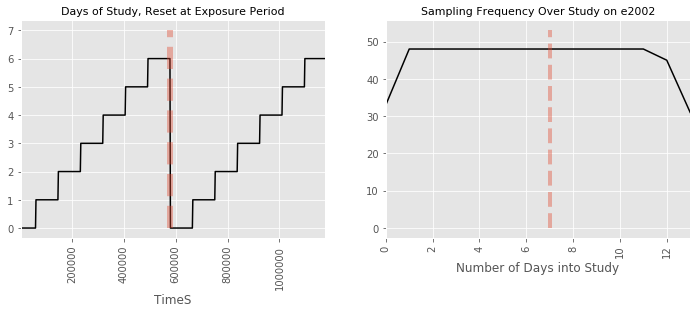

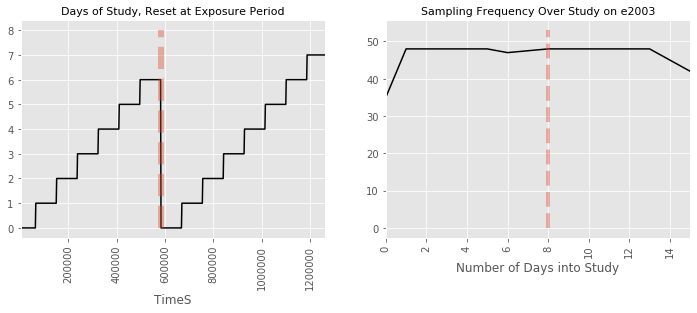

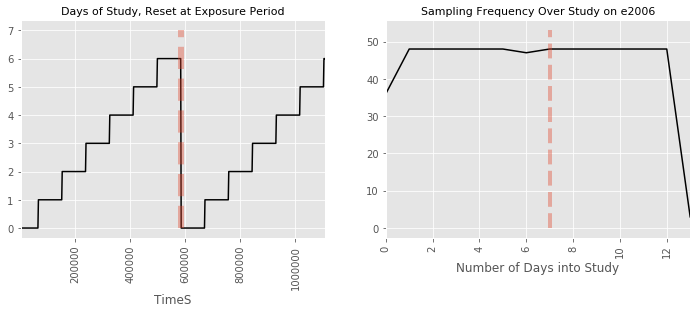

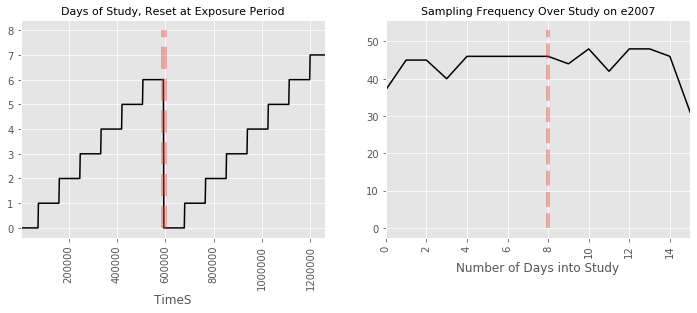

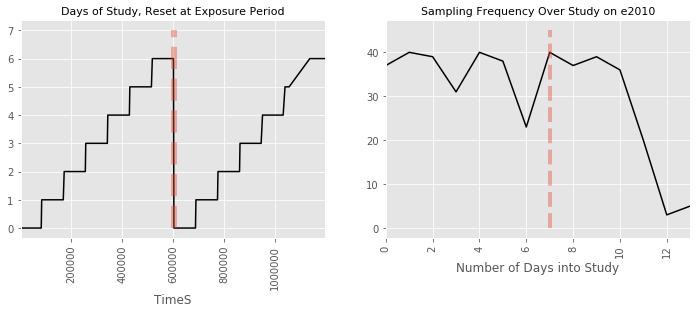

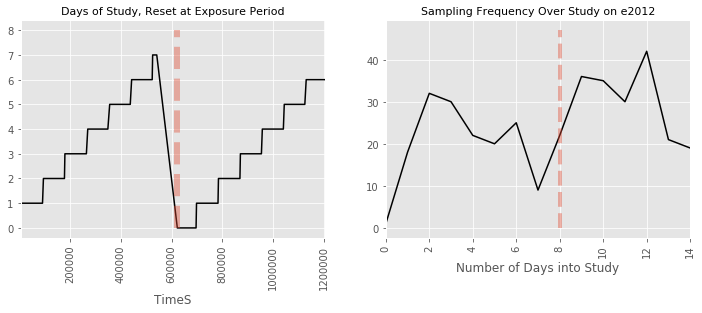

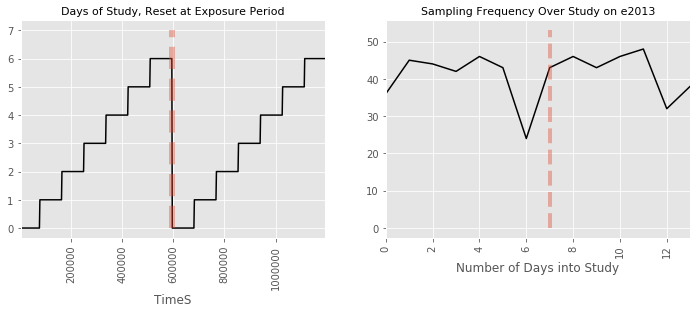

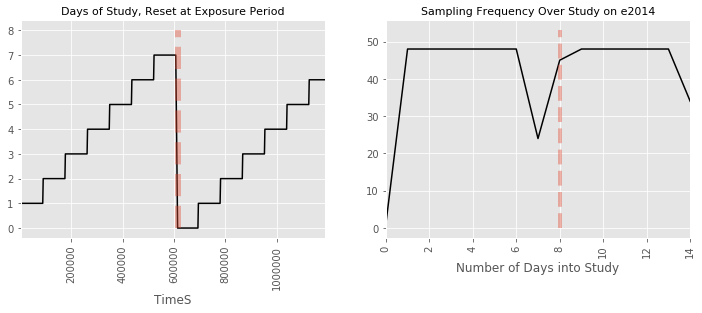

In [5]:
def sampling_analysis(subject):
    df_subj = df[df['SubjectName'] == subject]

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    num_days = len(np.unique(df_subj['Day']))
    first_exposed = df_subj.loc[df_subj.Y == 1]['TimeS'].to_list()[0]
    df_subj.plot(x='TimeS', y='Day', color='black', legend=False, subplots=True, ax=ax[0], rot=90)
    ax[0].plot([first_exposed, first_exposed], [0, num_days], lw=6, alpha=0.4, ls='--')
    ax[0].set_title("Days of Study, Reset at Exposure Period", fontsize=11)

    sampling_freqs = []
    exposed = []
    days = []

    for i in range(0, 2):
        for day in np.unique(df_subj.Day):
            num_obvs = len(df_subj.loc[df_subj.Y == i]
            .loc[df_subj.Day == day])
            days.append(day)
            exposed.append(i)
            sampling_freqs.append(num_obvs)

    sampling_freqs = pd.DataFrame(list(zip(days, exposed, sampling_freqs)), columns=['Day', 'Exposed', 'Sampling Frequency'])
    sampling_freqs = sampling_freqs[sampling_freqs['Sampling Frequency'] != 0]

    sampling_freqs.plot(y='Sampling Frequency', legend=False, color='black', subplots=True, ax=ax[1])
    exposed_start = sampling_freqs.loc[sampling_freqs['Exposed'] == 1].index[0]
    ax[1].plot([exposed_start, exposed_start], [0, max(sampling_freqs['Sampling Frequency'] + 5)], lw=4, alpha=0.4, ls='--')
    plt.xticks(rotation=90)
    plt.xlabel('Number of Days into Study')
    ax[1].set_title('Sampling Frequency Over Study on ' + subject, fontsize=11)

subjects = list(np.unique(df['SubjectName']))
for subject in subjects:
    sampling_analysis(subject)

## Observations
* Total of eight subjects, last five have much less consistent sampling frequency. Some sampling frequency trends have many smaller dips, while others just have one big dip.
    * For e2012, there were significantly less data collected on the seventh day than on the rest.
* The first Ebola study had more consistent sampling frequencies, with dips occurring **only** before the exposure period.
* All studies for the subjects but two start on Day 0. 
* For e2003 and e2007, there are more days of data collection after the exposure period than before.

In [6]:
time_steps = []
exposed_at = []

for subject in subjects:
    time_steps.append(max(df[df['SubjectName'] == subject]['TimeS']))
    exposed_at.append(min(df[(df['SubjectName'] == subject) & (df['Y'] == 1)]['TimeS']))

exposed_when = [i / j for i, j in zip(exposed_at, time_steps)]

length_exposed_df = pd.DataFrame(list(zip(subjects, time_steps, exposed_at, exposed_when)), columns=['SubjectName', 'Num_TimeS', 'TimeS_Exposed', 'StudyProgress_Exposed'])
length_exposed_df = length_exposed_df.set_index('SubjectName')
length_exposed_df

,Num_TimeS,TimeS_Exposed,StudyProgress_Exposed
SubjectName,,,
e2002,1175400,579600,0.493109
e2003,1261800,583200,0.462197
e2006,1107000,585000,0.528455
e2007,1260000,594000,0.471429
e2010,1195200,603000,0.504518
e2012,1204200,622800,0.517190
e2013,1193400,595800,0.499246
e2014,1188000,613800,0.516667


In [7]:
length_exposed_df.describe()

,Num_TimeS,TimeS_Exposed,StudyProgress_Exposed
count,8.000000e+00,8.00000,8.000000
mean,1.198125e+06,597150.00000,0.499101
std,4.909686e+04,15265.92845,0.022961
min,1.107000e+06,579600.00000,0.462197
25%,1.184850e+06,584550.00000,0.487689
50%,1.194300e+06,594900.00000,0.501882
75%,1.218150e+06,605700.00000,0.516797
max,1.261800e+06,622800.00000,0.528455


Text(0.5, 1.0, '# of Timesteps and Exposure Point for Each Subject')

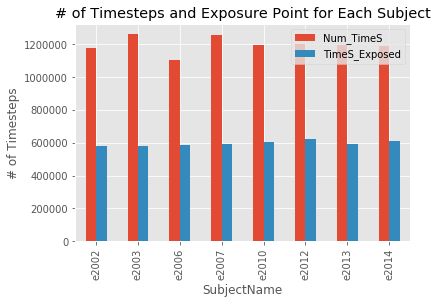

In [8]:
length_exposed_df.plot(y=['Num_TimeS', 'TimeS_Exposed'], kind='bar')
plt.ylabel('# of Timesteps')
plt.title('# of Timesteps and Exposure Point for Each Subject')


## Observations
* Again, all eight subjects are exposed halfway into their studies.
* In most cases, the longer studies had the least consistent sampling frequencies.
* Some studies may be shorter because the primate died.
* e2002's study was the shortest, and its sampling frequencies was perfectly consistent until the end.
* The paper said the primates had to be returned to their cages following aerosol exposure, and this took about 20 minutes
    * The preparation for this might have accounted for discrepancies in the sampling frequency.